https://jkolbert2.github.io/

# Introduction

Recently the Streaming market has seen a sudden, stark increase in competition. New companies seem to be entering the market every day, challenging the current champion, Netflix. Each company has its own advantages and disadvantages, and for the purpose of this project, I am going to focus on two companies in particular: Netflix and Disney. Disney recnetly launched their own streaming platfomr Disney+. I am curious to see how a entertainment conglomerate such as Disney's content compares with that of the newer Netflix. 

Specifically, I want to use the IMDB api available at http://www.omdbapi.com/, to compare these two companies average ratings for their projects. I want to seee how well movies these companies have produced has been recieved over time. Other questions include: does netflix thrive in producing well liked content in any specic Genre? How can netflix compete with the giant that is disney - are there any niches in which it can try to thrive? Does netflix utilize its ability to produce adult content to develop a competative advantage against disney's family friendly content?

Ultimatly, I hope to guide the reader of my tutorial through each step of my analysis. I would also like to reveal any insights within the data that may suggest one streaming service will be more liked by viewers other in the long term, although there are obvioulsy several exterior factors to this. 

My first step for this project is to create a histogram for the mean IMDB scores for either companies streaming service. Disney+ specific shows have been announced at (https://www.theverge.com/2019/10/14/20913417/disney-plus-launch-lineup-marvel-star-wars-pixar-tv-shows-movies-simpsons-national-geographic), and netflix has a wikipedia page about its orignal movie and TV productions.  Movies are here ((https://en.wikipedia.org/wiki/List_of_original_films_distributed_by_Netflix)) and Tv shows are  https://en.wikipedia.org/wiki/List_of_original_programs_distributed_by_Netflix

One last note here is that there are several exterior legal and technical distinctions between what one company actually "owns" in comparison to another. Licensing & distribution deals make this even more complicated and nuanced. For the purpose of this tutorial, I am going to try to analyze just the original content that is present on either platform because I believe that original content will be a key factor in deciding which companies will win the streaming wars - as original content is the one prodcut that cannot be taken away, and serves to create a competative advantage between companies. But for now, let's get started!

Make sure before attempting this that you have install html5lib and lxml. you should also go to (http://www.omdbapi.com/apikey.aspx) and generate an API key. Each API key only gets 1000 (free) requests to the database per day, so you may need to replace the API key paramater with you own API key in various URLs throughout this project. (make sure you remember to activate your key, as the instrutions on the omdb website indicate)

you also need to make sure you have decent internet connection - poor connection may result in a pull failing wiht a timeout.

# Getting Started with Data

## Part 1: Data Collection From http://www.omdbapi.com/

### Data Collection 1: Netflix

To collect ratings from Netflix, we are going to grab title names from the Wikipedia page of Netflix Origninal films (https://en.wikipedia.org/wiki/List_of_original_films_distributed_by_Netflix), Convert them into the appropratie URLs for OMDB, and then grab the necessary infomration out of the JSON unit that OMDB will return to us. We will then do the same for TV shows.  

The First step, grabbing titles from wikipedia, is seen below

In [1]:
# Step 0: necessary imports
import urllib.request
import bs4 as bs
import pandas as pd
import numpy as np
import requests
import xml.etree.ElementTree as ET
from io import StringIO
import html5lib

#Step 1: Pull page of original Netlix movies from wikipedia

netflix_list = "https://en.wikipedia.org/wiki/List_of_original_films_distributed_by_Netflix"
request_netflix = requests.get(netflix_list)
source_netflix = urllib.request.urlopen(netflix_list).read()
soup = bs.BeautifulSoup(source_netflix, 'html.parser')

#Step 2: isolate the tables from this page
table = soup.find_all('table')

#step 3: remove additional excess information
table = table[:-22]

#step 4: create df to store netflix original movies
netflix_films_df = pd.DataFrame()

#step 5: iterate over every table, parse its html, and add each table as a DF to the netflix films df
for table in table:
    pd_table = pd.read_html(table.prettify(), header = 0)
    temp_df = pd_table[0]
    netflix_films_df = netflix_films_df.append(temp_df, sort=False)
    
#we want to see all titles, so
pd.set_option('display.max_rows', 1000) #we want to see a lot of entries 


#step 6: drop any duplicate wikipedia entries
netflix_films_df = netflix_films_df.drop_duplicates(subset="Title", keep='first')

#step7: drop any that have yet to be released (TBA only. we don't remove NaNs, because some of the wikipedia entries simply don't have premiere info)
netflix_films_df = netflix_films_df[netflix_films_df['Premiere'] != "TBA"]

#step 8: display df
netflix_films_df





Title  \
0                                 Beasts of No Nation   
1    Crouching Tiger, Hidden Dragon: Sword of Destiny   
2                          The Fundamentals of Caring   
3                                             Rebirth   
4                                            Tallulah   
5                                                XOXO   
6                                                 ARQ   
7                             The Siege of Jadotville   
8       I Am the Pretty Thing That Lives in the House   
9                                              7 años   
10                                              Mercy   
11                                           Spectral   
12                                              Barry   
0                                          Coin Heist   
1                                            Clinical   
2                                                iBoy   
3                                     Imperial Dreams   
4          I Don't Feel at Home in This World Anymore   
5                                       Burning Sands   
6                          Deidra & Laney Rob a Train   
7                     The Most Hated Woman in America   
8                                       The Discovery   
9                                         Sand Castle   
10                                             Tramps   
11                                             Blame!   
12                                       Shimmer Lake   
13                                               Okja   
14                                        To the Bone   
15                                         Death Note   
16                        First They Killed My Father   
17                                      Gerald's Game   
18                                 Our Souls at Night   
19          The Meyerowitz Stories (New and Selected)   
20                                               1922   
21                                           Wheelman   
22                                         The Killer   
23                              Christmas Inheritance   
24                                             Bright   
0                                      The Open House   
1                             The Cloverfield Paradox   
2                                   Irreplaceable You   
3                                                Mute   
4                                        The Outsider   
5                                             Paradox   
6                                     Roxanne Roxanne   
7                                         First Match   
8                                          6 Balloons   
9                                             Amateur   
10                                        Come Sunday   
11                                          Sometimes   
12                               Forgive Us Our Debts   
13                                              Cargo   
14                                       Lust Stories   
15                                            Calibre   
16                                                TAU   
17                                        How It Ends   
18                                         Extinction   
19           The Most Assassinated Woman in the World   
20                                           Next Gen   
21                                         On My Skin   
22                          The Land of Steady Habits   
23                                          The Angel   
24                                      Hold the Dark   
25                                       Private Life   
26                                            22 July   
27                                            Apostle   
28                             The Night Comes for Us   
29                                       Been So Long   
30                         The Other Side of the Wind   
31                                        Outlaw King   
3

Now we are going to load netflix tv shows, from https://en.wikipedia.org/wiki/List_of_original_programs_distributed_by_Netflix
(You may notice a blank table - scroll down! The webscraping accidentally incorporated additional stuff that we don't need that clogs some of the columns.)

In [2]:
# Step 0: necessary imports
import urllib.request
import bs4 as bs
import pandas as pd
import numpy as np
import requests
import xml.etree.ElementTree as ET
from io import StringIO
import html5lib

#Step 1: Pull page of original Netlix movies from wikipedia

tv_netflix_list = "https://en.wikipedia.org/wiki/List_of_original_programs_distributed_by_Netflix"
request_netflix = requests.get(tv_netflix_list)
source_netflix = urllib.request.urlopen(tv_netflix_list).read()
soup = bs.BeautifulSoup(source_netflix, 'html.parser')

#Step 2: isolate the tables from this page
table = soup.find_all('table')

#step 3: remove additional excess information
table = table[:-22]

#step 4: create df to store netflix original movies
netflix_tv_df = pd.DataFrame()

#step 5: iterate over every table, parse its html, and add each table as a DF to the netflix films df
for table in table:
    pd_table = pd.read_html(table.prettify(), header = 0)
    temp_df = pd_table[0]
    netflix_tv_df = netflix_tv_df.append(temp_df, sort=False)
    
#we want to see all titles, so
pd.set_option('display.max_rows', 1000) #we want to see a lot of entries 


#step 6: drop any duplicate wikipedia entries
netflix_tv_df = netflix_tv_df.drop_duplicates(subset="Title", keep='first')

#step7: drop any that have yet to be released (TBA only. we don't remove NaNs, because some of the wikipedia entries simply don't have premiere info)
netflix_tv_df = netflix_tv_df[netflix_tv_df['Premiere'] != "TBA"]

#step 8: display df
netflix_tv_df



Title  \
0                                       House of Cards   
1                                        Hemlock Grove   
2                              Orange Is the New Black   
3                                           Marco Polo   
4                                            Bloodline   
5                                               Sense8   
6                                               Narcos   
7                                      Stranger Things   
8                                         The Get Down   
9                                            The Crown   
10                   Gilmore Girls: A Year in the Life   
11                                              The OA   
12                      A Series of Unfortunate Events   
13                                      13 Reasons Why   
14                                               Gypsy   
15                                               Ozark   
16                                          Mindhunter   
17                                             Godless   
18                                      Altered Carbon   
19                                       Seven Seconds   
20                                       Lost in Space   
21                                       The Innocents   
22                                        The Haunting   
23                      Chilling Adventures of Sabrina   
24                                      Narcos: Mexico   
25                                           Tidelands   
26                                The Umbrella Academy   
27                                           The Order   
28                                              Shadow   
29                                        Black Summer   
30                                            Chambers   
31                                         The Society   
32                                             What/If   
33                                    When They See Us   
34                                            Trinkets   
35                                        Another Life   
36                                        Wu Assassins   
37                 The Dark Crystal: Age of Resistance   
38                                          The I-Land   
39                                        Unbelievable   
40                                        Criminal: UK   
41                                        Raising Dion   
42                         Dolly Parton's Heartstrings   
43                                              V Wars   
44                                        Virgin River   
45                                            Upcoming   
46                                          Soundtrack   
47                                         The Witcher   
48                                       Messiah  [34]   
49                                   Locke & Key  [36]   
0                                            Daredevil   
1                                        Jessica Jones   
2                                            Luke Cage   
3                                            Iron Fist   
4                                        The Defenders   
5                                         The Punisher   
0                            Unbreakable Kimmy Schmidt   
1                                    Grace and Frankie   
2           Wet Hot American Summer: First Day of Camp   
3                                       Master of None   
4                                       W/ Bob & David   
5                                                 Love   
6                                         Fuller House   
7                                               Flaked   
8                     Netflix Presents: The Characters   
9                                            The Ranch   
10                                       Lady Dynamite   
11                                                Easy   
12                                     Haters B

The next part is to push these titles to the OMDB API, and find the correlating JSON data item for each movie. We will do movies first, then tv shows, then combine them. We must do this because the API only allows 1000 queries at a time, and there are more than 1000 entries if we combine movies and tv

In [4]:
#step 1: create df to hold new ratings df info
film_netflix_ratings_df = pd.DataFrame()

errors = 0
#step 2: iterate through each row in netflix_df grabbing title. from there
for row in netflix_films_df['Title']:
    try:
        row_search = urllib.parse.quote(row)
        #convert each row to a ombdapi URL. notcie the %s, which is a placeholder for the approrpriate movie
        #it may be worth it to add in a placeholder for the API key as well. 
        url = ("http://www.omdbapi.com/?t=%s&r=json&apikey=67ca8c9d" % row_search)
        request = requests.get(url)
        source = urllib.request.urlopen(url).read()
        source = source.decode()
        d = {'Title' : row, 'JSON_DATA' : source}
        df = pd.DataFrame(data=d, index=[0])
        film_netflix_ratings_df = film_netflix_ratings_df.append(df)
    #test for any errors in retrieving data
    #This will likely only fire if you have an expired API key. 
    #if this happens, you need to generate a new api key(see intro) and replace the api key (currently 67ca8c9d) (try aa11aa8, 742f26a8, or 8564eff2, ed54ed5a) in the URL.
    except:
        print("Error with %s" % row)
        print(url)
        errors += 1

Now the tv shows. You may notice an error here - the api returns this error for a specific tv show, because there are several with that name. We deal with this error later.

In [5]:
#step 1: create df to hold new ratings df info
tv_netflix_ratings_df = pd.DataFrame()

errors = 0
#step 2: iterate through each row in netflix_df grabbing title. from there
for row in netflix_tv_df['Title']:
    try:
        row_search = urllib.parse.quote(row)
        #convert each row to a ombdapi URL. notcie the %s, which is a placeholder for the approrpriate movie
        #it may be worth it to add in a placeholder for the API key as well. 
        url = ("http://www.omdbapi.com/?t=%s&r=json&apikey=64b4a0cd" % row_search)
        request = requests.get(url)
        source = urllib.request.urlopen(url).read()
        source = source.decode()
        d = {'Title' : row, 'JSON_DATA' : source}
        df = pd.DataFrame(data=d, index=[0])
        tv_netflix_ratings_df = tv_netflix_ratings_df.append(df)
    #test for any errors in retrieving data
    #This will likely only fire if you have an expired API key. 
    #if this happens, you need to generate a new api key(see intro) and replace the api key (currently 76c90977) (try aa11aa8, 742f26a8, or 8564eff2, ed54ed5a) in the URL.
    except:
        print("Error with %s" % row)
        print(url)
        errors += 1

Error with nan
http://www.omdbapi.com/?t=You%20Me%20Her&r=json&apikey=64b4a0cd


In [6]:
print("%s error in getting json data" % errors)
pd.set_option('display.max_rows', 50) #we don't need to see a lot of entries  here
netflix_ratings_df = pd.concat([tv_netflix_ratings_df, film_netflix_ratings_df], sort=False)
netflix_ratings_df

1 error in getting json data


Title                                          JSON_DATA
0            House of Cards  {"Title":"House of Cards","Year":"2013–2018","...
0             Hemlock Grove  {"Title":"Hemlock Grove","Year":"2013–2015","R...
0   Orange Is the New Black  {"Title":"Orange Is the New Black","Year":"201...
0                Marco Polo  {"Title":"Marco Polo","Year":"2014–2016","Rate...
0                 Bloodline  {"Title":"Bloodline","Year":"2015–2017","Rated...
..                      ...                                                ...
0    An Afternoon with SCTV    {"Response":"False","Error":"Movie not found!"}
0     Derren Brown: Miracle  {"Title":"Derren Brown: Miracle","Year":"2016"...
0    Derren Brown: The Push  {"Title":"Derren Brown: Pushed to the Edge","Y...
0             Dying to Tell  {"Title":"Dying to Tell","Year":"2018","Rated"...
0     Kevin Hart: What Now?  {"Title":"Kevin Hart: What Now?","Year":"2016"...

[1327 rows x 2 columns]

Notice how the index has become all 0. This is because of how we constructed the dataframe - we made each returned title + JSON value a seperate series, then added this series to temporary dataframe. Within this temporary dataframe, every item had an index of 0. Thus, when we then append this dataframe to the final dataframe, every value has an index of 0. This has a simple fix.

In [7]:
netflix_ratings_df.reset_index(inplace = True, drop=True)
netflix_ratings_df

Title  \
0              House of Cards   
1               Hemlock Grove   
2     Orange Is the New Black   
3                  Marco Polo   
4                   Bloodline   
...                       ...   
1322   An Afternoon with SCTV   
1323    Derren Brown: Miracle   
1324   Derren Brown: The Push   
1325            Dying to Tell   
1326    Kevin Hart: What Now?   

                                              JSON_DATA  
0     {"Title":"House of Cards","Year":"2013–2018","...  
1     {"Title":"Hemlock Grove","Year":"2013–2015","R...  
2     {"Title":"Orange Is the New Black","Year":"201...  
3     {"Title":"Marco Polo","Year":"2014–2016","Rate...  
4     {"Title":"Bloodline","Year":"2015–2017","Rated...  
...                                                 ...  
1322    {"Response":"False","Error":"Movie not found!"}  
1323  {"Title":"Derren Brown: Miracle","Year":"2016"...  
1324  {"Title":"Derren Brown: Pushed to the Edge","Y...  
1325  {"Title":"Dying to Tell","Year":"2018","Rated"...  
1326  {"Title":"Kevin Hart: What Now?","Year":"2016"...  

[1327 rows x 2 columns]

You may notice how some of these say "response:false, error: movie not found!"
lets isolate these movies and see if we can find a pattern.

In [8]:
error_netflix_movies = netflix_ratings_df[netflix_ratings_df['JSON_DATA'] == "{\"Response\":\"False\",\"Error\":\"Movie not found!\"}"]

#we will also remove these from the current dataframe, so we can add in the fixes later
netflix_ratings_df = netflix_ratings_df[netflix_ratings_df['JSON_DATA'] != "{\"Response\":\"False\",\"Error\":\"Movie not found!\"}"]

error_netflix_movies


Title  \
48                                  Messiah  [34]   
49                              Locke & Key  [36]   
60                                 W/ Bob & David   
64               Netflix Presents: The Characters   
69      Trailer Park Boys Out of the Park: Europe   
...                                           ...   
1299           The Awakening of Motti Wolkenbruch   
1304  A Shaun the Sheep Movie: Farmageddon  [294]   
1309      Flavors of Youth: International Version   
1316     Modest Heroes: Ponoc Short Films Theater   
1322                       An Afternoon with SCTV   

                                            JSON_DATA  
48    {"Response":"False","Error":"Movie not found!"}  
49    {"Response":"False","Error":"Movie not found!"}  
60    {"Response":"False","Error":"Movie not found!"}  
64    {"Response":"False","Error":"Movie not found!"}  
69    {"Response":"False","Error":"Movie not found!"}  
...                                               ...  
1299  {"Response":"False","Error":"Movie not found!"}  
1304  {"Response":"False","Error":"Movie not found!"}  
1309  {"Response":"False","Error":"Movie not found!"}  
1316  {"Response":"False","Error":"Movie not found!"}  
1322  {"Response":"False","Error":"Movie not found!"}  

[255 rows x 2 columns]

Some of these appear to be still in development. Some however,appear to be creating an error because of wikipedia citaitons! lets edit those out

In [9]:
#because we are working with a slice of a dataframe here, we need to suppress the settingwithcopywarning
pd.options.mode.chained_assignment = None

#now we will edit out the citations
error_netflix_movies['Title'] = error_netflix_movies['Title'].str.split('\[').str[0]
error_netflix_movies

Title  \
48                                    Messiah     
49                                Locke & Key     
60                               W/ Bob & David   
64             Netflix Presents: The Characters   
69    Trailer Park Boys Out of the Park: Europe   
...                                         ...   
1299         The Awakening of Motti Wolkenbruch   
1304     A Shaun the Sheep Movie: Farmageddon     
1309    Flavors of Youth: International Version   
1316   Modest Heroes: Ponoc Short Films Theater   
1322                     An Afternoon with SCTV   

                                            JSON_DATA  
48    {"Response":"False","Error":"Movie not found!"}  
49    {"Response":"False","Error":"Movie not found!"}  
60    {"Response":"False","Error":"Movie not found!"}  
64    {"Response":"False","Error":"Movie not found!"}  
69    {"Response":"False","Error":"Movie not found!"}  
...                                               ...  
1299  {"Response":"False","Error":"Movie not found!"}  
1304  {"Response":"False","Error":"Movie not found!"}  
1309  {"Response":"False","Error":"Movie not found!"}  
1316  {"Response":"False","Error":"Movie not found!"}  
1322  {"Response":"False","Error":"Movie not found!"}  

[255 rows x 2 columns]

Now lets run these back through our previous steps to push it to OMDB, and reject any that are in development.

In [10]:
fixed_netflix_errors_df = pd.DataFrame()
for row in error_netflix_movies['Title']:
    try:
        row_search = urllib.parse.quote(row)
        url = ("http://www.omdbapi.com/?t=%s&r=json&apikey=accc7130" % row_search)
        request = requests.get(url)
        source = urllib.request.urlopen(url).read()
        source = source.decode()
        d = {'Title' : row, 'JSON_DATA' : source}
        df = pd.DataFrame(data=d, index=[0])
        fixed_netflix_errors_df = fixed_netflix_errors_df.append(df)
    #test for any errors in retrieving data
    #This will likelye only trigger if you have an expired api key (try a7e31369 or aa11aa8, instead!). Replace this key if errors are triggered
    except:
        print("Error with %s" % row)
        print(url)
        errors += 1


In [11]:
#now we can assume that any more not found movies are likely in development, and we should drop them.
fixed_netflix_errors_df = fixed_netflix_errors_df[fixed_netflix_errors_df['JSON_DATA'] != "{\"Response\":\"False\",\"Error\":\"Movie not found!\"}"]
fixed_netflix_errors_df

Title  \
0                                Messiah     
0                            Locke & Key     
0                               The Gift     
0                           The Neighbor     
0                                   Ares     
..                                     ...   
0                         The Main Event     
0                     My Father's Dragon     
0                              Pinocchio     
0                   The Power of the Dog     
0   A Shaun the Sheep Movie: Farmageddon     

                                            JSON_DATA  
0   {"Title":"Messiah","Year":"2001","Rated":"N/A"...  
0   {"Title":"Locke & Key","Year":"2011","Rated":"...  
0   {"Title":"The Gift","Year":"2015","Rated":"R",...  
0   {"Title":"The Neighbor","Year":"2018","Rated":...  
0   {"Title":"Ares","Year":"2016","Rated":"N/A","R...  
..                                                ...  
0   {"Title":"The Main Event","Year":"1979","Rated...  
0   {"Title":"My Father's Dragon","Year":"1997","R...  
0   {"Title":"Pinocchio","Year":"1940","Rated":"G"...  
0   {"Title":"The Power of the Dog","Year":"2014",...  
0   {"Title":"A Shaun the Sheep Movie: Farmageddon...  

[64 rows x 2 columns]

Now we just add these fixed values back to the original dataframe, and drop any remainint errors - these errors comopose a negligible amount of the dataframe, and are likely due to extreme circumstances that are not reflective of broader trends (e.x. error returned bc two movies with same name)

In [20]:
netflix_ratings_df = netflix_ratings_df.append(fixed_netflix_errors_df, sort=False)

#drop any additional values that returned multiple IMDB pages. Negligent amount and thus easy to dispose of
netflix_ratings_df = netflix_ratings_df[netflix_ratings_df['JSON_DATA'] != "{\"Response\":\"False\",\"Error\":\"Subquery returned more than 1 value. This is not permitted when the subquery follows =, !=, <, <= , >, >= or when the subquery is used as an expression.\"}"]
netflix_ratings_df =  netflix_ratings_df[netflix_ratings_df['JSON_DATA'] != "{\"Response\":\"False\",\"Error\":\"Error getting data.\"}"]
netflix_ratings_df


Title  \
0                           House of Cards   
1                            Hemlock Grove   
2                  Orange Is the New Black   
3                               Marco Polo   
4                                Bloodline   
..                                     ...   
0                         The Main Event     
0                     My Father's Dragon     
0                              Pinocchio     
0                   The Power of the Dog     
0   A Shaun the Sheep Movie: Farmageddon     

                                            JSON_DATA  Year  
0   {"Title":"House of Cards","Year":"2013–2018","...  2013  
1   {"Title":"Hemlock Grove","Year":"2013–2015","R...  2013  
2   {"Title":"Orange Is the New Black","Year":"201...  2013  
3   {"Title":"Marco Polo","Year":"2014–2016","Rate...  2014  
4   {"Title":"Bloodline","Year":"2015–2017","Rated...  2015  
..                                                ...   ...  
0   {"Title":"The Main Event","Year":"1979","Rated...   NaN  
0   {"Title":"My Father's Dragon","Year":"1997","R...   NaN  
0   {"Title":"Pinocchio","Year":"1940","Rated":"G"...   NaN  
0   {"Title":"The Power of the Dog","Year":"2014",...   NaN  
0   {"Title":"A Shaun the Sheep Movie: Farmageddon...   NaN  

[1261 rows x 3 columns]

We must once again reset the index, for the same reason previously discussed

In [21]:
netflix_ratings_df.reset_index(inplace = True, drop=True)
netflix_ratings_df

Title  \
0                             House of Cards   
1                              Hemlock Grove   
2                    Orange Is the New Black   
3                                 Marco Polo   
4                                  Bloodline   
...                                      ...   
1256                        The Main Event     
1257                    My Father's Dragon     
1258                             Pinocchio     
1259                  The Power of the Dog     
1260  A Shaun the Sheep Movie: Farmageddon     

                                              JSON_DATA  Year  
0     {"Title":"House of Cards","Year":"2013–2018","...  2013  
1     {"Title":"Hemlock Grove","Year":"2013–2015","R...  2013  
2     {"Title":"Orange Is the New Black","Year":"201...  2013  
3     {"Title":"Marco Polo","Year":"2014–2016","Rate...  2014  
4     {"Title":"Bloodline","Year":"2015–2017","Rated...  2015  
...                                                 ...   ...  
1256  {"Title":"The Main Event","Year":"1979","Rated...   NaN  
1257  {"Title":"My Father's Dragon","Year":"1997","R...   NaN  
1258  {"Title":"Pinocchio","Year":"1940","Rated":"G"...   NaN  
1259  {"Title":"The Power of the Dog","Year":"2014",...   NaN  
1260  {"Title":"A Shaun the Sheep Movie: Farmageddon...   NaN  

[1261 rows x 3 columns]

Now that we have a dataframe with each row representing one movie and its associated JSON data, we can parse this JSON data for interesting data. Specifically, we are looking for: Rating data, Rating count, Release Year, and Genre

In [22]:

netflix_ratings_df['Year'] = netflix_ratings_df['JSON_DATA'].apply(lambda x: x.split("Year")[1][3:7])
netflix_ratings_df['Rating'] = netflix_ratings_df['JSON_DATA'].apply(lambda x: x.split("imdbRating")[1][3:6])
netflix_ratings_df['Genre'] = netflix_ratings_df['JSON_DATA'].apply(lambda x: x.split("Genre")[1][3:6])

netflix_ratings_df['Genre'].unique()

#N/A will automatically be converted to np.nan
netflix_ratings_df["Genre"] = netflix_ratings_df["Genre"].map({
       "Dra": "Drama",
       "Cri": "Crime",
       "Act": "Action",
       "Com": "Comedy",
       "Thr": "Thriller",
       "Hor": "Horror",
       "Bio": "Biography",
       "Ani": "Animation",
       "Mys": "Myster",
       "Sci": "Sci-Fi",
       "Sho": "Short",
       "Adv": "Adventure",
       "Rom": "Romance",
       "Doc": "Documentary",
       "Mus": "Music",
       "Rea": "Reality",
       "Fam": "Family",
       "Fan": "Fantasy",
       "Adu": "Adult"
})
#for now, we will drop the JSON data column. If in the future, we decide we want more data, we can always load it in again
netflix_ratings_df['Ratings_Count'] = netflix_ratings_df['JSON_DATA'].apply(lambda x: x.split("imdbVotes")[1].split(":")[1].replace("\"", '').replace("imdbID", '').replace(",", ''))
netflix_ratings_df['Ratings_Count'] = netflix_ratings_df['Ratings_Count'].replace(['N/A'], np.nan)
netflix_ratings_df['Ratings_Count'] = netflix_ratings_df['Ratings_Count'].astype(float)
netflix_ratings_df = netflix_ratings_df.drop(['JSON_DATA'], axis=1)
netflix_ratings_df


Title  Year Rating      Genre  \
0                             House of Cards  2013    8.8      Drama   
1                              Hemlock Grove  2013    7.2     Horror   
2                    Orange Is the New Black  2013    8.1     Comedy   
3                                 Marco Polo  2014    8.0  Adventure   
4                                  Bloodline  2015    8.0      Drama   
...                                      ...   ...    ...        ...   
1256                        The Main Event    1979    5.9     Comedy   
1257                    My Father's Dragon    1997    6.5  Animation   
1258                             Pinocchio    1940    7.4  Animation   
1259                  The Power of the Dog    2014    N/A      Crime   
1260  A Shaun the Sheep Movie: Farmageddon    2019    7.1  Animation   

      Ratings_Count  
0          440131.0  
1           34914.0  
2          266392.0  
3           58101.0  
4           39969.0  
...             ...  
1256         2364.0  
1257           16.0  
1258       120078.0  
1259            NaN  
1260         1618.0  

[1261 rows x 5 columns]

Our data is almost perfect, but there are still some flaws. Specifically, let's take a look at what happens when we run netflix_ratings_df.Year.unique()

In [23]:
netflix_ratings_df.Year.unique()

array(['2013', '2014', '2015', '2016', ' the', '2017', '2018', '1998',
       '1961', '1999', '2019', '2003', '2011', 'ater', '1986', '2006',
       '1996', '2005', '1966', '1989', '2010', '1995', '1993', '1979',
       '2007', '2012', '2004', '1978', '1908', '1982', '2008', '1994',
       '1967', '1974', '', '1990', '1924', '1992', '2002', 'f My', '2000',
       '2020', 'ght"', '1983', '1956', '1954', 'd Ma', '1991', '2001',
       '2009', '1898', '1985', '1932', '1939', '1970', '1955', '1997',
       '1940'], dtype=object)

Netflix started releasing original content in 2013. So what's going on here? Well let's take another look at this data. 

In [24]:
pd.set_option('display.max_rows', 50)
netflix_ratings_df

Title  Year Rating      Genre  \
0                             House of Cards  2013    8.8      Drama   
1                              Hemlock Grove  2013    7.2     Horror   
2                    Orange Is the New Black  2013    8.1     Comedy   
3                                 Marco Polo  2014    8.0  Adventure   
4                                  Bloodline  2015    8.0      Drama   
...                                      ...   ...    ...        ...   
1256                        The Main Event    1979    5.9     Comedy   
1257                    My Father's Dragon    1997    6.5  Animation   
1258                             Pinocchio    1940    7.4  Animation   
1259                  The Power of the Dog    2014    N/A      Crime   
1260  A Shaun the Sheep Movie: Farmageddon    2019    7.1  Animation   

      Ratings_Count  
0          440131.0  
1           34914.0  
2          266392.0  
3           58101.0  
4           39969.0  
...             ...  
1256         2364.0  
1257           16.0  
1258       120078.0  
1259            NaN  
1260         1618.0  

[1261 rows x 5 columns]

Notice "into the deep" is listed as 1994. It looks like our API is conflating a netflix movie (release date TBD) with an already existing movie (see https://www.imdb.com/title/tt0110150/)

How can we solve this? Well, most of the movies this appears to be occuring with (including other examples in this dataframe, such as war party (https://www.imdb.com/title/tt0098619/), night on earth, pinnochio, etc, are conflating newly planned netflix movies with older films with the same name. Many of these movies have not yet been released, so they don't have IMDB pages. If they did, the API defaults to the newest verison. This can be show with the newest cinderella movie. If we give the api just the term "cinderella", it returns the 2015 version. see: (http://www.omdbapi.com/?t=cinderella&r=json&apikey=ed54ed5a). Thus, we can conclude that any film that returns and older version is a planned netflix movie that has not yet been released.

Thus, we can simply drop these.

In [25]:
#identify valid years
valid_years = ['2013', '2014', '2015', '2016', '2017', '2018', '2019']

#remove those that are in valid years
netflix_ratings_df = netflix_ratings_df[netflix_ratings_df['Year'].isin(valid_years)]

#confirm
netflix_ratings_df.Year.unique() 

array(['2013', '2014', '2015', '2016', '2017', '2018', '2019'],
      dtype=object)

Great! the only years present in this dataframe are those in which netflix actually produced original content

Now we are going to find a Distibution of IMDB ratings for netflix movies!

Text(5.5, 180, 'Netflix Original Content')

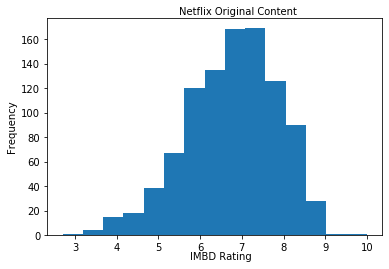

In [28]:
#step 1: convert necessary dtypes, and replace any missing values in ratings column

netflix_ratings_df['Rating'] = netflix_ratings_df['Rating'].replace(['N/A'], np.nan)
netflix_ratings_df['Rating'] = netflix_ratings_df['Rating'].astype(float)

#step 2: plot it!
netflix_s = netflix_ratings_df['Rating'].dropna()
#netflix_ax = netflix_s.plot.hist(bins=10) #,  cumulative=True, weights=netflix_w)
netflix_ratings_hist = netflix_ratings_df['Rating'].plot.hist(bins = 15, by="Rating") #, weights=netflix_ratings_df["Ratings_Count"])

#stpe 3: edit labels
netflix_ratings_hist.text(6.5, -20, 'IMBD Rating', ha='center')
netflix_ratings_hist.text(5.5, 180, 'Netflix Original Content')


### Data Collection 2: Disney+

To aggregate information for disney, we are going to grab the list of every title that is currently available on disney+ from this verge article (https://www.theverge.com/2019/10/14/20913417/disney-plus-launch-lineup-marvel-star-wars-pixar-tv-shows-movies-simpsons-national-geographic). We will then, much like we did for Netflix, convert these movies to the approriate URL for OMDB, and then grab the information we want out of the returned JSON unit.

In [29]:
#step 0: imports
import urllib.request
import bs4 as bs
import pandas as pd
import numpy as np
import requests
import xml.etree.ElementTree as ET
from io import StringIO

#step 1: Necessary Setting adjustments
pd.set_option('display.max_rows', 100) #we want to see a lot of rows
apikey = 'b9b7add3' #apikey to access omdb. 

#step 2: pull page from theverge
disney_list = "https://www.theverge.com/2019/10/14/20913417/disney-plus-launch-lineup-marvel-star-wars-pixar-tv-shows-movies-simpsons-national-geographic"
request_disney = requests.get(disney_list)
source_disney = urllib.request.urlopen(disney_list).read()
soup = bs.BeautifulSoup(source_disney, 'html.parser')

#step 3: isolate title lines in HTML 
list2 = soup.find_all('em')
list_true = list2[20:] #first 20 characters are explanatory, here we skip over htese

#step 4: create series out of title list
disney_films = pd.Series(list_true)

#step 5: turn it into a dataframe
disney_films_df = pd.DataFrame(disney_films, columns=['Title'])

#step 6: convert all titles to strings only
disney_films_df['Title'] =  disney_films_df['Title'].apply(lambda x: str(x))

#step 7: replace <em> tags with. '' so we isolatetitles
disney_films_df['Title'] =  disney_films_df['Title'].apply(lambda x: x.replace('<em>','').replace('</em>',''))

#Step 8: filter out extra data
disney_films_df = disney_films_df[:-5] #last 5 rows are explanatory/irrelevnt <em> tags. remove mannually

#step 9: display
disney_films_df


Title
0                        Swiss Family Robinson 
1                        Miracle on 34th Street
2                              Treasure Island 
3    The Story of Robin Hood and His Merrie Men
4                             The Living Desert
..                                          ...
646                    Gordon Ramsay: Uncharted
647                   Kingdom of the White Wolf
648                                The Simpsons
649              Ice Age: The Great Egg-Scapade
650                            Little Einsteins

[651 rows x 1 columns]

Now that we have a list of titles, we can push them to the OMBD API to get a JSON object containing relevant infomration.

In [32]:
#current api key: ed54ed5a
#optional api keys: aa11aa8, a7e31369 or your own!
#if you get the "failed at url" message, create a new api key,  activate it, and paste it into the line ("http://www.omdbapi.com/?t=%s&r=json&apikey=PASTEHERE)"


from urllib.parse import urlencode
problematic_titles = []
returned_null = []
errors = 0
apikey="ed54ed5a"
disney_films_df_best = pd.DataFrame()
for row in disney_films_df['Title']:
    try:
        row_search = urllib.parse.quote(row)
        url = ("http://www.omdbapi.com/?t=%s&r=json&apikey=4148dbf1" % row_search)
        request = requests.get(url)
        source = urllib.request.urlopen(url).read()
        source = source.decode()
        d = {'Title' : row, 'JSON_DATA' : source}
        df = pd.DataFrame(data=d, index=[0])
        disney_films_df_best = disney_films_df_best.append(df)
    except:
        print("failed at %s" % url)
disney_films_df_best


Title  \
0                       Swiss Family Robinson    
0                       Miracle on 34th Street   
0                             Treasure Island    
0   The Story of Robin Hood and His Merrie Men   
0                            The Living Desert   
..                                         ...   
0                     Gordon Ramsay: Uncharted   
0                    Kingdom of the White Wolf   
0                                 The Simpsons   
0               Ice Age: The Great Egg-Scapade   
0                             Little Einsteins   

                                            JSON_DATA  
0   {"Title":"Swiss Family Robinson","Year":"1960"...  
0   {"Title":"Miracle on 34th Street","Year":"1947...  
0   {"Title":"Treasure Island","Year":"1950","Rate...  
0   {"Title":"The Story of Robin Hood and His Merr...  
0   {"Title":"The Living Desert","Year":"1953","Ra...  
..                                                ...  
0   {"Title":"Gordon Ramsay: Uncharted","Year":"20...  
0   {"Title":"Kingdom of the White Wolf","Year":"2...  
0   {"Title":"The Simpsons","Year":"1989–","Rated"...  
0   {"Title":"Ice Age: The Great Egg-Scapade","Yea...  
0   {"Title":"Little Einsteins","Year":"2005–","Ra...  

[651 rows x 2 columns]

In [33]:
#drop duplicates and measure and display table
disney_films_df_best = disney_films_df_best.drop_duplicates(subset="Title", keep='first')
disney_films_df_best.count()
disney_films_df_best

Title  \
0                       Swiss Family Robinson    
0                       Miracle on 34th Street   
0                             Treasure Island    
0   The Story of Robin Hood and His Merrie Men   
0                            The Living Desert   
..                                         ...   
0                     Gordon Ramsay: Uncharted   
0                    Kingdom of the White Wolf   
0                                 The Simpsons   
0               Ice Age: The Great Egg-Scapade   
0                             Little Einsteins   

                                            JSON_DATA  
0   {"Title":"Swiss Family Robinson","Year":"1960"...  
0   {"Title":"Miracle on 34th Street","Year":"1947...  
0   {"Title":"Treasure Island","Year":"1950","Rate...  
0   {"Title":"The Story of Robin Hood and His Merr...  
0   {"Title":"The Living Desert","Year":"1953","Ra...  
..                                                ...  
0   {"Title":"Gordon Ramsay: Uncharted","Year":"20...  
0   {"Title":"Kingdom of the White Wolf","Year":"2...  
0   {"Title":"The Simpsons","Year":"1989–","Rated"...  
0   {"Title":"Ice Age: The Great Egg-Scapade","Yea...  
0   {"Title":"Little Einsteins","Year":"2005–","Ra...  

[647 rows x 2 columns]

Now, Let's check for errors, Like we did with netflix

In [34]:
error_checking = disney_films_df_best.copy()
disney_film_errors = error_checking[error_checking['JSON_DATA'] == "{\"Response\":\"False\",\"Error\":\"Movie not found!\"}"]

disney_film_errors


Title  \
0                 Darby O’Gill and the Little People   
0                            Sammy, the Way-Out Seal   
0                          Blackbeard’s Ghost (1968)   
0                    Sultan and the Rock Star (1980)   
0                                 Mr. Boogedy (1986)   
0                                  Fuzzbucket (1986)   
0                                 Turner &amp; Hooch   
0                        Three Men and a Little Lady   
0                         I’ll Be Home for Christmas   
0                           Don’t Look Under the Bed   
0                          America’s Heart and Soul    
0                 High School Musical 3: Senior Year   
0                                 Teen Beach Movie 2   
0                               Oliver &amp; Company   
0              Pocahontas II: Journey to a New World   
0                    The Lion King II: Simba’s Pride   
0           The Little Mermaid II: Return to the Sea   
0           Lady and the Tramp II: Scamp’s Adventure   
0                    Cinderella II: Dreams Come True   
0                     The Hunchback of Notre Dame II   
0                                  Lilo &amp; Stitch   
0                                  Tarzan &amp; Jane   
0        101 Dalmatians II: Patch’s London Adventure   
0                       Recess: Taking the 5th Grade   
0                                   The Lion King 1½   
0                   Kim Possible Movie: So the Drama   
0           Lilo &amp; Stitch 2: Stitch Has a Glitch   
0                                           Bambi II   
0                    Garfield: A Tail of Two Kitties   
0                                 Leroy &amp; Stitch   
0                    Cinderella III: A Twist in Time   
0                                        Casebusters   
0                        The Little Mermaid - Series   
0                                 Timon &amp; Pumbaa   
0                              Mighty Ducks - Series   
0                                  Hercules - Series   
0                                Even Stevens (2000)   
0                      Lilo &amp; Stitch: The Series   
0                  The Suite Life of Zack &amp; Cody   
0                       My Friends Tigger &amp; Pooh   
0                              Crash &amp; Bernstein   
0                               The Muppets - Series   
0                      The Book of Once Upon a Time    
0            Captain Jake and the Never Land Pirates   
0                       Rapunzel’s Tangled Adventure   
0                      Coop &amp; Cami Ask the World   
0                 Star Wars: The Clone Wars - Series   
0  Star Wars: The Clone Wars- The Lost Missions -...   
0            LEGO Star Wars: The New Yoda Chronicles   
0        Spider-Man and His Amazing Friends - Series   
0                                     X-Men - Series   
0                                 Iron Man - Series    
0                  Marvel Comics Spider-Man - Series   
0                      The Incredible Hulk – Series    
0                   The Avengers: United They Stand    
0                     Spider-Man Unlimited - Series    
0                          X-Men: Evolution - Series   
0              Iron Man Armored Adventures - Series    
0                         Marvel Ultimate Spider-Man   
0        Hulk and the Agents of S.M.A.S.H. - Series    
0               Marvel’s Avengers Assemble - Series    
0                  Guardians of the Galaxy - Series    
0      Marvel’s Avengers: Ultron Revolution - Series   
0  Marvel’s Ultimate Spider-Man Vs. The Sinister ...   
0           Marvel’s Avengers: Secret Wars - Series    
0                       Marvel’s Spider-Man - Series   
0  Marvel’s Avengers: Black Panther’s Quest - Ser...   
0  Marvel’s Guardians of the Galaxy: Mission Brea...   
0               Stonehenge Decoded: Secrets Revealed   
0                             Easter Island Unsolved   
0                              Journey to Shark Eden   
0              

The errors here are a bit more complicated than they were for netflix.

"teen beach movie 2", for insantce, fails because IMDB lists it as "Teen beach 2." That being said, there are still some patterns we can try to fix. 

Some movies, for instance, have the year they were released in parenthesis next to their name. in the case of blackbeard's ghost, for instance, this makes the API fail to find it. The first thing well do is thus detect and fix those parenthesis.

In [35]:
disney_film_errors['Title'] = disney_film_errors['Title'].str.split('(').str[0]
disney_film_errors

Title  \
0                 Darby O’Gill and the Little People   
0                            Sammy, the Way-Out Seal   
0                                Blackbeard’s Ghost    
0                          Sultan and the Rock Star    
0                                       Mr. Boogedy    
0                                        Fuzzbucket    
0                                 Turner &amp; Hooch   
0                        Three Men and a Little Lady   
0                         I’ll Be Home for Christmas   
0                           Don’t Look Under the Bed   
0                          America’s Heart and Soul    
0                 High School Musical 3: Senior Year   
0                                 Teen Beach Movie 2   
0                               Oliver &amp; Company   
0              Pocahontas II: Journey to a New World   
0                    The Lion King II: Simba’s Pride   
0           The Little Mermaid II: Return to the Sea   
0           Lady and the Tramp II: Scamp’s Adventure   
0                    Cinderella II: Dreams Come True   
0                     The Hunchback of Notre Dame II   
0                                  Lilo &amp; Stitch   
0                                  Tarzan &amp; Jane   
0        101 Dalmatians II: Patch’s London Adventure   
0                       Recess: Taking the 5th Grade   
0                                   The Lion King 1½   
0                   Kim Possible Movie: So the Drama   
0           Lilo &amp; Stitch 2: Stitch Has a Glitch   
0                                           Bambi II   
0                    Garfield: A Tail of Two Kitties   
0                                 Leroy &amp; Stitch   
0                    Cinderella III: A Twist in Time   
0                                        Casebusters   
0                        The Little Mermaid - Series   
0                                 Timon &amp; Pumbaa   
0                              Mighty Ducks - Series   
0                                  Hercules - Series   
0                                      Even Stevens    
0                      Lilo &amp; Stitch: The Series   
0                  The Suite Life of Zack &amp; Cody   
0                       My Friends Tigger &amp; Pooh   
0                              Crash &amp; Bernstein   
0                               The Muppets - Series   
0                      The Book of Once Upon a Time    
0            Captain Jake and the Never Land Pirates   
0                       Rapunzel’s Tangled Adventure   
0                      Coop &amp; Cami Ask the World   
0                 Star Wars: The Clone Wars - Series   
0  Star Wars: The Clone Wars- The Lost Missions -...   
0            LEGO Star Wars: The New Yoda Chronicles   
0        Spider-Man and His Amazing Friends - Series   
0                                     X-Men - Series   
0                                 Iron Man - Series    
0                  Marvel Comics Spider-Man - Series   
0                      The Incredible Hulk – Series    
0                   The Avengers: United They Stand    
0                     Spider-Man Unlimited - Series    
0                          X-Men: Evolution - Series   
0              Iron Man Armored Adventures - Series    
0                         Marvel Ultimate Spider-Man   
0        Hulk and the Agents of S.M.A.S.H. - Series    
0               Marvel’s Avengers Assemble - Series    
0                  Guardians of the Galaxy - Series    
0      Marvel’s Avengers: Ultron Revolution - Series   
0  Marvel’s Ultimate Spider-Man Vs. The Sinister ...   
0           Marvel’s Avengers: Secret Wars - Series    
0                       Marvel’s Spider-Man - Series   
0  Marvel’s Avengers: Black Panther’s Quest - Ser...   
0  Marvel’s Guardians of the Galaxy: Mission Brea...   
0               Stonehenge Decoded: Secrets Revealed   
0                             Easter Island Unsolved   
0                              Journey to Shark Eden   
0              

Another common issue is that some movies have a II, whereas the API expects a 2. or the movie is listed as III, wheras the API expects 3. This is also a simple fix

In [36]:
disney_film_errors['Title'] = disney_film_errors['Title'].str.replace('III', '3')
disney_film_errors['Title'] = disney_film_errors['Title'].str.replace('II', '2')
disney_film_errors

Title  \
0                 Darby O’Gill and the Little People   
0                            Sammy, the Way-Out Seal   
0                                Blackbeard’s Ghost    
0                          Sultan and the Rock Star    
0                                       Mr. Boogedy    
0                                        Fuzzbucket    
0                                 Turner &amp; Hooch   
0                        Three Men and a Little Lady   
0                         I’ll Be Home for Christmas   
0                           Don’t Look Under the Bed   
0                          America’s Heart and Soul    
0                 High School Musical 3: Senior Year   
0                                 Teen Beach Movie 2   
0                               Oliver &amp; Company   
0               Pocahontas 2: Journey to a New World   
0                     The Lion King 2: Simba’s Pride   
0            The Little Mermaid 2: Return to the Sea   
0            Lady and the Tramp 2: Scamp’s Adventure   
0                     Cinderella 2: Dreams Come True   
0                      The Hunchback of Notre Dame 2   
0                                  Lilo &amp; Stitch   
0                                  Tarzan &amp; Jane   
0         101 Dalmatians 2: Patch’s London Adventure   
0                       Recess: Taking the 5th Grade   
0                                   The Lion King 1½   
0                   Kim Possible Movie: So the Drama   
0           Lilo &amp; Stitch 2: Stitch Has a Glitch   
0                                            Bambi 2   
0                    Garfield: A Tail of Two Kitties   
0                                 Leroy &amp; Stitch   
0                      Cinderella 3: A Twist in Time   
0                                        Casebusters   
0                        The Little Mermaid - Series   
0                                 Timon &amp; Pumbaa   
0                              Mighty Ducks - Series   
0                                  Hercules - Series   
0                                      Even Stevens    
0                      Lilo &amp; Stitch: The Series   
0                  The Suite Life of Zack &amp; Cody   
0                       My Friends Tigger &amp; Pooh   
0                              Crash &amp; Bernstein   
0                               The Muppets - Series   
0                      The Book of Once Upon a Time    
0            Captain Jake and the Never Land Pirates   
0                       Rapunzel’s Tangled Adventure   
0                      Coop &amp; Cami Ask the World   
0                 Star Wars: The Clone Wars - Series   
0  Star Wars: The Clone Wars- The Lost Missions -...   
0            LEGO Star Wars: The New Yoda Chronicles   
0        Spider-Man and His Amazing Friends - Series   
0                                     X-Men - Series   
0                                 Iron Man - Series    
0                  Marvel Comics Spider-Man - Series   
0                      The Incredible Hulk – Series    
0                   The Avengers: United They Stand    
0                     Spider-Man Unlimited - Series    
0                          X-Men: Evolution - Series   
0              Iron Man Armored Adventures - Series    
0                         Marvel Ultimate Spider-Man   
0        Hulk and the Agents of S.M.A.S.H. - Series    
0               Marvel’s Avengers Assemble - Series    
0                  Guardians of the Galaxy - Series    
0      Marvel’s Avengers: Ultron Revolution - Series   
0  Marvel’s Ultimate Spider-Man Vs. The Sinister ...   
0           Marvel’s Avengers: Secret Wars - Series    
0                       Marvel’s Spider-Man - Series   
0  Marvel’s Avengers: Black Panther’s Quest - Ser...   
0  Marvel’s Guardians of the Galaxy: Mission Brea...   
0               Stonehenge Decoded: Secrets Revealed   
0                             Easter Island Unsolved   
0                              Journey to Shark Eden   
0              

Now we can again try to find matching imdb pages, with this edited df

In [37]:
fixes = pd.DataFrame()
for row in disney_film_errors['Title']:
    try:
        row_search = urllib.parse.quote(row)
        url = ("http://www.omdbapi.com/?t=%s&r=json&apikey=d28b037d" % row_search)
        request = requests.get(url)
        source = urllib.request.urlopen(url).read()
        source = source.decode()
        d = {'Title' : row, 'JSON_DATA' : source}
        df = pd.DataFrame(data=d, index=[0])
        fixes = fixes.append(df)
    except:
        print("failed at %s" % url)

Now we can remove the erros from the initial df, and add back the components we were able to fix

In [38]:
#drop errored entries
disney_films_df_best = disney_films_df_best[disney_films_df_best['JSON_DATA'] != "{\"Response\":\"False\",\"Error\":\"Movie not found!\"}"]
#add back entries we were able to fix
disney_films_df_best.append(fixes)

#drop entries that yielded multiple pages
disney_films_df_best = disney_films_df_best[disney_films_df_best['JSON_DATA'] != "{\"Response\":\"False\",\"Error\":\"Subquery returned more than 1 value. This is not permitted when the subquery follows =, !=, <, <= , >, >= or when the subquery is used as an expression.\"}"]

disney_films_df_best

Title  \
0                       Swiss Family Robinson    
0                       Miracle on 34th Street   
0                             Treasure Island    
0   The Story of Robin Hood and His Merrie Men   
0                            The Living Desert   
..                                         ...   
0                     Gordon Ramsay: Uncharted   
0                    Kingdom of the White Wolf   
0                                 The Simpsons   
0               Ice Age: The Great Egg-Scapade   
0                             Little Einsteins   

                                            JSON_DATA  
0   {"Title":"Swiss Family Robinson","Year":"1960"...  
0   {"Title":"Miracle on 34th Street","Year":"1947...  
0   {"Title":"Treasure Island","Year":"1950","Rate...  
0   {"Title":"The Story of Robin Hood and His Merr...  
0   {"Title":"The Living Desert","Year":"1953","Ra...  
..                                                ...  
0   {"Title":"Gordon Ramsay: Uncharted","Year":"20...  
0   {"Title":"Kingdom of the White Wolf","Year":"2...  
0   {"Title":"The Simpsons","Year":"1989–","Rated"...  
0   {"Title":"Ice Age: The Great Egg-Scapade","Yea...  
0   {"Title":"Little Einsteins","Year":"2005–","Ra...  

[566 rows x 2 columns]

For the purpose of our analysis we want Movie title (which we arleady have), Rating data, Release Year, and Genre

In [39]:

disney_films_df_best['Year'] = disney_films_df_best['JSON_DATA'].apply(lambda x: x.split("Year")[1][3:7])
disney_films_df_best['Rating'] = disney_films_df_best['JSON_DATA'].apply(lambda x: x.split("imdbRating")[1][3:6])
disney_films_df_best['Genre'] = disney_films_df_best['JSON_DATA'].apply(lambda x: x.split("Genre")[1][3:6])
disney_films_df_best['Genre'].unique()

#N/A will automatically be converted to np.nan
disney_films_df_best["Genre"] = disney_films_df_best["Genre"].map({
       "Dra": "Drama",
       "Cri": "Crime",
       "Act": "Action",
       "Com": "Comedy",
       "Thr": "Thriller",
       "Hor": "Horror",
       "Bio": "Biography",
       "Ani": "Animation",
       "Mys": "Myster",
       "Sci": "Sci-Fi",
       "Sho": "Short",
       "Adv": "Adventure",
       "Rom": "Romance",
       "Doc": "Documentary",
       "Mus": "Music",
       "Rea": "Reality",
       "Fam": "Family",
       "Fan": "Fantasy",
       "Adu": "Adult"
})
disney_films_df_best['Ratings_Count'] = disney_films_df_best['JSON_DATA'].apply(lambda x: x.split("imdbVotes")[1].split(":")[1].replace("\"", '').replace("imdbID", '').replace(",", ''))
disney_films_df_best['Ratings_Count'] = disney_films_df_best['Ratings_Count'].replace(['N/A'], np.nan)
disney_films_df_best['Ratings_Count'] = disney_films_df_best['Ratings_Count'].astype(float)

#for now, we will drop the JSON data column. If in the future, we decide we want more data, we can always load it in again

disney_films_df_best = disney_films_df_best.drop(['JSON_DATA'], axis=1)
disney_films_df_best


Title  Year Rating        Genre  \
0                       Swiss Family Robinson   1960    7.2    Adventure   
0                       Miracle on 34th Street  1947    7.9       Comedy   
0                             Treasure Island   1950    6.9    Adventure   
0   The Story of Robin Hood and His Merrie Men  1952    6.7       Action   
0                            The Living Desert  1953    7.6       Family   
..                                         ...   ...    ...          ...   
0                     Gordon Ramsay: Uncharted  2019    8.0    Adventure   
0                    Kingdom of the White Wolf  2019    7.0  Documentary   
0                                 The Simpsons  1989    8.7    Animation   
0               Ice Age: The Great Egg-Scapade  2016    5.9    Animation   
0                             Little Einsteins  2005    6.4    Animation   

    Ratings_Count  
0         12491.0  
0         37479.0  
0          6167.0  
0          1147.0  
0          1083.0  
..            ...  
0           238.0  
0            10.0  
0        328282.0  
0          2741.0  
0           948.0  

[566 rows x 5 columns]

Now lets verify the years, like for netflix.

In [40]:
disney_films_df_best.Year.unique()

array(['1960', '1947', '1950', '1952', '1953', '1954', '1955', '1956',
       '1957', '1958', '2006', '2008', '1907', '1998', '1961', '1990',
       '1962', '1963', '1964', '2001', '1965', '1966', '1967', '1968',
       '1969', '1971', '1972', '1974', '1975', '1976', '2003', '1977',
       '2016', '1978', '1979', '1980', '2015', '1981', '1982', '1985',
       '1986', '1987', '1994', '1988', '1989', '1991', '1992', '1993', '',
       '2011', '1995', '1996', '1997', '1999', '2000', '1921', '2002',
       '2004', '2005', '2007', '2009', '2010', '2012', '2013', '2014',
       '2017', '2018', '1941', '2019', '1937', '1940', '1942', '1944',
       '1948', '1949', '1959', '1970', '1984', '1983', 'ater'],
      dtype=object)

Disney has been around for a while, so these make more sense. Excpet for the last one "Ater", and a few ''. These must have been picked up from the webscraping.

In [41]:
disney_films_df_best = disney_films_df_best[disney_films_df_best['Year'] != "ater"]
disney_films_df_best = disney_films_df_best[disney_films_df_best['Year'] != ""]
disney_films_df_best.Year.unique()

array(['1960', '1947', '1950', '1952', '1953', '1954', '1955', '1956',
       '1957', '1958', '2006', '2008', '1907', '1998', '1961', '1990',
       '1962', '1963', '1964', '2001', '1965', '1966', '1967', '1968',
       '1969', '1971', '1972', '1974', '1975', '1976', '2003', '1977',
       '2016', '1978', '1979', '1980', '2015', '1981', '1982', '1985',
       '1986', '1987', '1994', '1988', '1989', '1991', '1992', '1993',
       '2011', '1995', '1996', '1997', '1999', '2000', '1921', '2002',
       '2004', '2005', '2007', '2009', '2010', '2012', '2013', '2014',
       '2017', '2018', '1941', '2019', '1937', '1940', '1942', '1944',
       '1948', '1949', '1959', '1970', '1984', '1983'], dtype=object)

Now lets reset the index, just like we did for netflix

In [42]:
disney_films_df_best.reset_index(drop=True, inplace=True)

In [43]:
disney_films_df_best

Title  Year Rating        Genre  \
0                        Swiss Family Robinson   1960    7.2    Adventure   
1                        Miracle on 34th Street  1947    7.9       Comedy   
2                              Treasure Island   1950    6.9    Adventure   
3    The Story of Robin Hood and His Merrie Men  1952    6.7       Action   
4                             The Living Desert  1953    7.6       Family   
..                                          ...   ...    ...          ...   
557                    Gordon Ramsay: Uncharted  2019    8.0    Adventure   
558                   Kingdom of the White Wolf  2019    7.0  Documentary   
559                                The Simpsons  1989    8.7    Animation   
560              Ice Age: The Great Egg-Scapade  2016    5.9    Animation   
561                            Little Einsteins  2005    6.4    Animation   

     Ratings_Count  
0          12491.0  
1          37479.0  
2           6167.0  
3           1147.0  
4           1083.0  
..             ...  
557          238.0  
558           10.0  
559       328282.0  
560         2741.0  
561          948.0  

[562 rows x 5 columns]

Now lets see a quick distribution of disney plus' IMDB ratings, just like we did with Netflix

Text(5.5, 80, 'Dinsey+ IMBD Ratings')

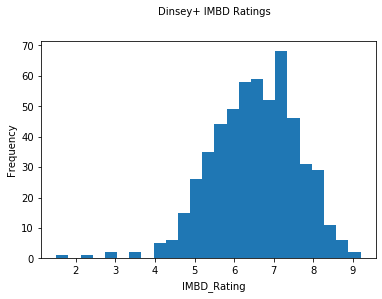

In [44]:
#Replace n/a with np.nan
disney_films_df_best['Rating'] = disney_films_df_best['Rating'].replace(['N/A'], np.nan)

#convert ratings to float
disney_films_df_best['Rating'] = disney_films_df_best['Rating'].astype(float)


#drop na in ratings, keep track of rating as a seperate series, in case we need it later
disney_s = disney_films_df_best['Rating'].dropna()


ax = disney_films_df_best.Rating.plot.hist(bins=25)
ax.text(5.5, -10, 'IMBD_Rating', ha='center')
ax.text(5.5, 80, 'Dinsey+ IMBD Ratings', ha='center')

# PART 2: Analysis & Visualization 

## Ratings Distrubitons

Now that we have collected, processed, tidies, and done some bried exploratory analysis on this data, We can begin to do some real analysis to try to generate any insight into which platform has an advantage in the coming streaming wars in terms of content quantity and quality. 

Let's start out by simply blotting a distribution of the ratings for the content on either platform. 

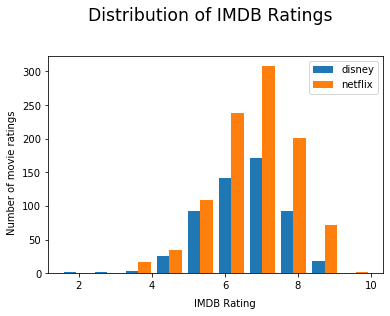

In [59]:
ax.legend(["Disney", "Netflix"]);

import matplotlib.pyplot as plt
plt.hist([disney_s, netflix_s], label=['disney', 'netflix'])
plt.suptitle('Distribution of IMDB Ratings', x=0.5, y=1.05, ha='center', fontsize='xx-large')
plt.text(6, -50, 'IMDB Rating', ha='center')
plt.text(0.04, 150, 'Number of movie ratings', va='center', rotation='vertical')
plt.legend(loc='upper right')

The above histogram shows a distribution of Disney+ media content ratings vs Netflix orginal content ratings.  This is a trend over hundreds of media pieces, and each rating represents many peoples votes. 

The initial perspective of this graph is that netflix is actually beating disney by wide margins in terms of quantity of content! This definitly suprised me and subverted my expectations. 

How can we more accuratley detect if there is a signficant distinction in terms of quality or populatrity?? Well the first step is to criticize the above figure.

Notice how the above figure treats every movie with equal merit. The rating for a move that very few people have seen holds as much merit as a movie that many people have seen. Think about it this way: in the above chart, Swiss Family Robinson holds as much weight in terms of representing disney as Star wars does.

The question is thus: how do we display popularity? 

Thankfully, we can use the number of ratings a movie has as a proxy for this. Essentially, we will weight each movies rating by how many reviews that movie has on IMDB. 


Text(0.04, 10500000, 'Number of individual ratings  ')

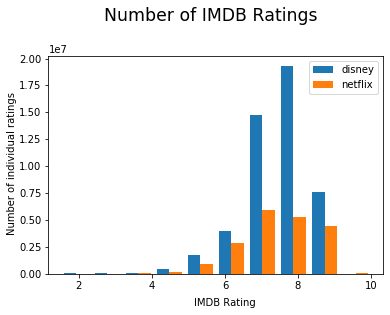

In [81]:
import matplotlib.pyplot as plt


#keep track of ratings_count as a seperate series, so that we can use it to weigth the ratings later. 
disney_w = disney_films_df_best['Ratings_Count'].dropna()
netflix_w = netflix_ratings_df['Ratings_Count'].dropna()

#disney_s and netflix_s are series of the disney and netflix ratings. they were generated in a seperate step.
plt.hist([disney_s, netflix_s], label=['disney', 'netflix'], weights=(disney_w, netflix_w))
plt.legend(loc='upper right')
plt.suptitle('Number of IMDB Ratings', x=0.5, y=1.05, ha='center', fontsize='xx-large')
plt.text(6, -3000000, 'IMDB Rating', ha='center')
plt.text(0.04, 10500000, 'Number of individual ratings  ', va='center', rotation='vertical')

Interesting! There are several insights that we can draw from this graph. Notice how disney absolutely drawfs netflix in terms of content popularity. One important thing to note is that Netflix is actually taking the lead in terms of quantity of content. Specifically, Disney has 562 rows in this dataframe, while Netflix has 1261! In spite of this, Netflix has significantly lower imdb ratings. this means that even though Disney+ has less content, its content is both more well liked and more popular. Disney's content gets millions more ratings. 


## Distribution by Genre 

The question then arises: which type of content is more popular on which platforms? We can try to determine this by dividing the content into Generes, and seeing the rankings for each assocaited content on each platform. 

First, we will need to make two sepereate dataframes, which will each be the result of performing a groupby function on both the disney and netflix dataframes, based on their genre column. From there, we will calculate the mean rating for each genre on either dataframe. we will then merge these two dataframes, so that we can run analysis on the resulting df. See below.

In [82]:
#group by netflix
netflix_by_genre = netflix_ratings_df.groupby('Genre', sort=False)
netflix_genre_ratings = netflix_by_genre['Rating'].mean()


#group by Disney
disney_by_genre = disney_films_df_best.groupby('Genre', sort=False)
disney_genre_ratings = disney_by_genre['Rating'].mean()


#make new dataframes
netflix_genre_ratings_df = pd.DataFrame(data=netflix_genre_ratings)
disney_genre_ratings_df = pd.DataFrame(data=disney_genre_ratings)

#merge
ratings_by_genre_df = disney_genre_ratings_df.merge(netflix_genre_ratings_df, how="outer", on = "Genre")

#specify column names so we don't get confused
ratings_by_genre_df = ratings_by_genre_df.rename(columns={"Rating_x": "Disney_Ratings", "Rating_y": "Netflix_Ratings"})

ratings_by_genre_df



Disney_Ratings  Netflix_Ratings
Genre                                       
Adventure          6.285915         6.517391
Comedy             5.916547         6.531068
Action             6.629032         6.639326
Family             6.052632         6.644444
Documentary        7.169565         7.235359
Short                   NaN         7.378947
Drama              6.454839         6.679747
Animation          6.954777         6.898246
Biography          7.092308         6.992000
Crime              7.800000         7.021875
Music              8.400000         7.050000
Reality            7.800000         6.808333
Horror                  NaN         5.740000
Thriller                NaN         5.538462
Fantasy                 NaN         6.666667
Sci-Fi                  NaN         5.600000
Romance                 NaN         5.985714
Myster                  NaN         6.250000

When looking at this, the first thing to notice is incredibly obvious: Why are there no Disney Romances? no disney Sci-Fi or Fantasy? The answer is that our API takes the first genre given, and disney will always list the first genre of their movies as that which has the broadest appeal. Take, for instance, mary poppins. The move on IMDB (see here https://www.imdb.com/title/tt0058331/?ref_=fn_al_tt_1) is listed as "comedy, family, fantasy." our API looks at and only returns "comedy". This is an unfortunate shortcoming of our data, but I believe its necessary. The alternative is to tag every movie with every single one of its genres, and this means every movie would be double  or triple counted - each would have to appear several times in each of the genre groups. This would make any conclusions we draw extremely muddled and ripe for innacuracies. If we want to make conclusions about which content either company is better at, then it simply makes the most sense to assocaite each movie with their "primary" genre - that is, the genre that is first listed on IMDB. While its not perfect, the alternatives are far worse. 


Now that we have a df wiith each genre and either companies assoicated mean ratings for that genre, lets plot them!


Text(0, 0.5, 'Average IMDB Rating')

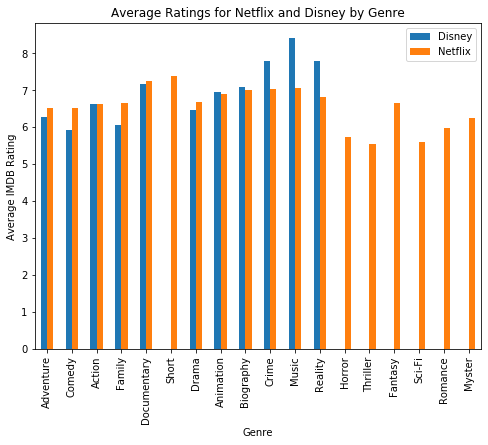

In [83]:
ax = ratings_by_genre_df.plot.bar(figsize=(8,6),title="Average Ratings for Netflix and Disney by Genre")#(x='Genre', y='Ratin', rot=0)
ax.legend(["Disney", "Netflix"]);
ax.set_xlabel("Genre")

# Set the label for the y-axis
ax.set_ylabel("Average IMDB Rating")

The above graph is really interesting! It highlights how, generally speaking, The two companies produce pretty comparable content. Netflix just barely beats out disney in adventure, comedy, and familty, while disney absolutely drwarfs netflix in Crime, Music, and Reality. The two giants are virtually tied for Action.  Netflix doesn't seem to be losing by a massive degree in terms of quality, as per our predictions via the histogram thaat was weighted by populatrity. One reason this might be the case is that Netflix beats Disney in every Genre that disney is not competing in. In Genres such as Mystery, horror, or thriller, Netflix beats Disney because Disney refused to compete, perhaps due to the potential that an r rate movie would hurt their family friendly image. 

You may think that this graphic falls to the same issue that the graphic at the start of part 2 fell to - each movie is weighed equally. However, I would argue that this graph is more insightful - we are trying to draw conclusiosn about which type of genee either company is good at producing, in terms of quality. If we weighed for ratings counts by genre, we would just see disney drawfing netflix again, due to the popularity of their content. This would hinder our ability to draw interesting and insightful conclusions.

## Distribution by year

The last thing I wanted to cover in tutorial is trends over time. Specifically, I wanted to see any trends over time - has either company gotten better at producing content over time? Is there any Genre that disney has gotten better - or worse- at producing in the past 50 years? 

I also want to address concerns about time bias in this data. Specifically, as this one guy (http://www.georgesaines.com/blog/2015/2/25/imdb-score-bias-its-temporal) and this one redditor (https://www.reddit.com/r/movies/comments/bxu247/analysis_of_recency_bias_in_imdb_movie_ratings/) argues, IMDB ratings are inflated when a movie premieres. This creates a bias of newer movies having generally higher ratings. I would like to investigate to what extent this bias exists here, and how it affects either platform.



First, lets try to see some trends over time! 

Let's start out with some basics: just ratings over time for netflix and disney. Since netflix has existed for such a shorter time, it doesn't make a lot of sense to plot the two together, as you would barely even be able to see netflix. 

Text(0, 0.5, 'IMDB rating')

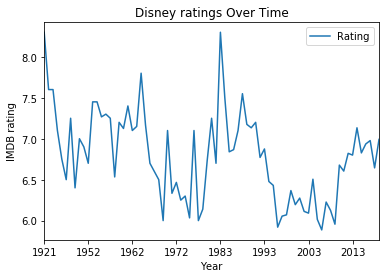

In [90]:
disney_over_time = disney_films_df_best.pivot_table(index=["Year"], values="Rating", aggfunc="mean")

ax = disney_over_time.plot(title='Disney ratings Over Time')
ax.set_xlabel("Year")
ax.set_ylabel("IMDB rating")

Text(0, 0.5, 'IMDB rating')

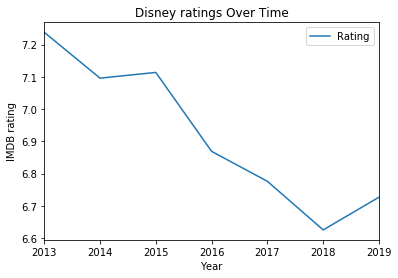

In [91]:
netflix_over_time = netflix_ratings_df.pivot_table(index=["Year"], values="Rating", aggfunc="mean")
ax = netflix_over_time.plot(title='Disney ratings Over Time')
ax.set_xlabel("Year")
ax.set_ylabel("IMDB rating")

These are interesting! Notice How disney has seen massive volatility over time. Another interesting point is that netflix appears to have peaked in 2014, and been steadily decreasing since. To be fair, however, netflix has a much smaller time frame, so it would be innacurate to draw conclusions from just this graph.

One thing I want to discusss here is the issue of recency bias. Recency bias is the idea that movies that were recently released see a bonus in ratings. These charts do not depict this trend. There are serveral reasons this could be the case. The first is that the recency bias is not really a thing - or that it is something that only affects a specific subset of movies, and thus largely does not affect our data in the long run. Another possibility is that this bias does exist, and we will in future years see today's ratings of recent movies go down. 

Unfortunatly, the API we use in this tutorial cannot access previous ratings. As such, it is impossible to perform analysis as to whether or not ratings will lower over time. If recency bias were substantial, we would expect to see recnet years have a significant peak in terms of average ratings. This is not the case for either Netflix or Disney. Both companies average ratings are lower than they were at their peak, and Netflix's specificlaly is almost as low as it has ever been. Thus, we can argue that this bias is generally insignificant and will not largly impact our dataa.

Let's see if we can break down any of these values by genre, to notice any trends!  We'll start with Netflix

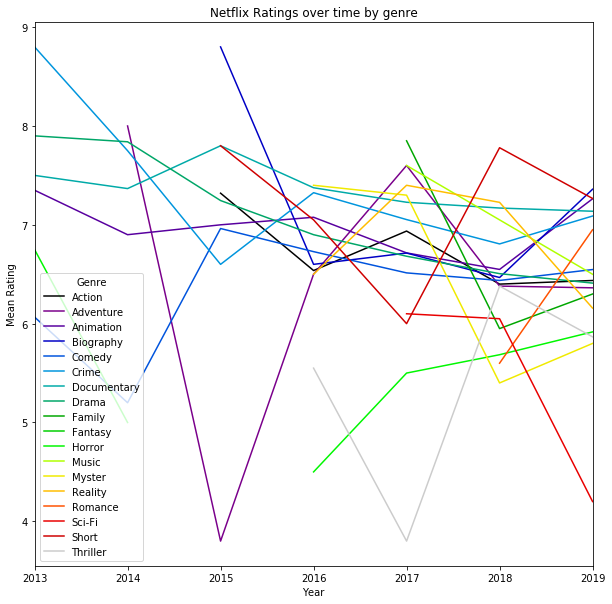

In [92]:
netflix_years = netflix_ratings_df.pivot_table(index=["Year"], values="Rating",  columns=["Genre"], aggfunc="mean")
ax = netflix_years.plot(figsize=(10,10), title ="Netflix Ratings over time by genre", colormap="nipy_spectral")

#step3: remove scientific notation for consistency
plt.ticklabel_format(style='plain', axis='y')

#step 4: set labels
ax.set_ylabel("Mean Rating")
ax.set_xlabel("Year")
ax

First off, I would like to say that it is very difficult to find a colormap that adequatly represents every genre. I chose nipy_spectral because I believe it has the greatest contrast, but if you find another I encourage you to use it.

We noted before that netflix can compete with disney by doing the things that disney won't: i.e. horror films, scifi, and thrillers. Among these, netflix appears to be largely unscucessful. Scifi is the red bar that has decreased dramatically over the past few years, and Thriller has also largely stagnated. The genres that appear to be successfull for netflix over  time are animation, Documentary, and biographies.  This is a poor stratagy for netflix, who appears to be trying to beat Disney on Disney's home field: Animation. A smarter tactic would be to invest into horror, scifi, etc to try to compete in markets that Disney won't enter. 

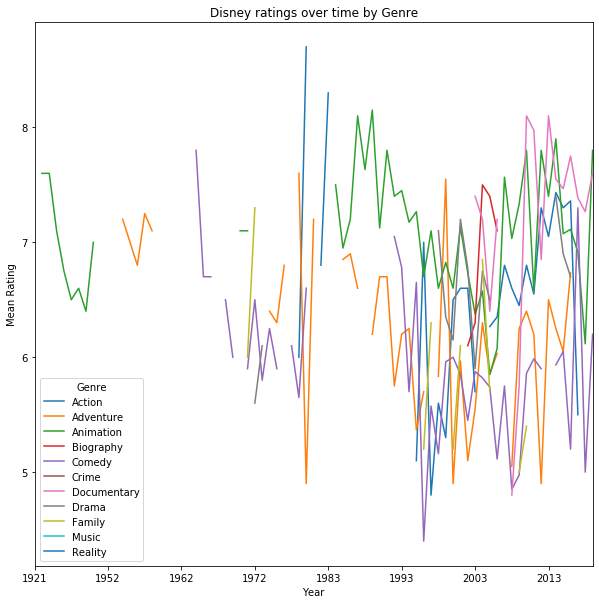

In [98]:
disney_years = disney_films_df_best.pivot_table(index=["Year"], values="Rating",  columns=["Genre"], aggfunc="mean")
ax = disney_years.plot(figsize=(10,10), title = "Disney ratings over time by Genre")

#step3: remove scientific notation for consistency
plt.ticklabel_format(style='plain', axis='y')

#step 4: set labels
ax.set_ylabel("Mean Rating")
ax.set_xlabel("Year")
ax

The above graph is interesting, but it's too volatile and cluttered to really gain any insights from. How can we make this better? We can discretize these results into five year periods!

In [99]:
#first we have to convert disney's year columns into ints.
disney_films_df_best['Year'] = disney_films_df_best['Year'].astype(int)

#next, we have to identify the potential year sections
year_sections = np.arange(1921, 2019, 5)

#now we will make a copy of the df
discrete_disney = disney_films_df_best.copy()

#now we will split it into discrete sections
discrete_disney['Year_range'] = pd.cut(discrete_disney['Year'], year_sections, right=True)
discrete_disney.head()

Title  Year  Rating      Genre  \
0                      Swiss Family Robinson   1960     7.2  Adventure   
1                      Miracle on 34th Street  1947     7.9     Comedy   
2                            Treasure Island   1950     6.9  Adventure   
3  The Story of Robin Hood and His Merrie Men  1952     6.7     Action   
4                           The Living Desert  1953     7.6     Family   

   Ratings_Count    Year_range  
0        12491.0  (1956, 1961]  
1        37479.0  (1946, 1951]  
2         6167.0  (1946, 1951]  
3         1147.0  (1951, 1956]  
4         1083.0  (1951, 1956]

Now that we have broken this up by time range, we can run some analysis!

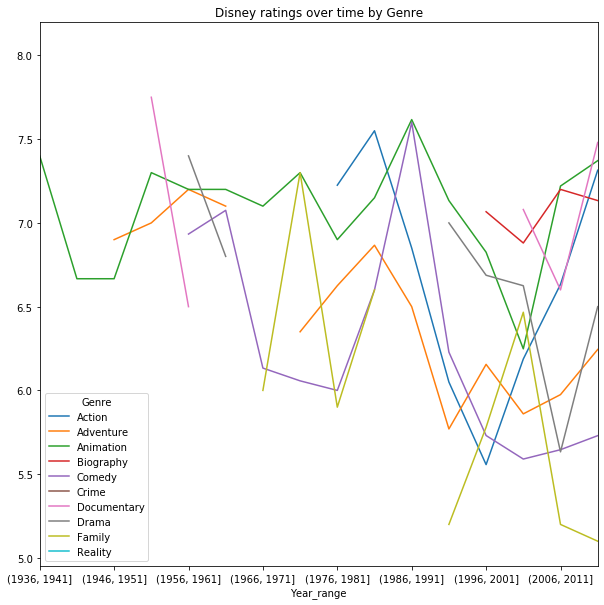

In [100]:
discrete_disney_by_genre = discrete_disney.pivot_table(index=["Year_range"], values="Rating",  columns=["Genre"], aggfunc="mean")

ax = discrete_disney_by_genre.plot(figsize=(10,10), title = "Disney ratings over time by Genre")


This graph is much clearer, and allows us to notice trends. One thing I want to point out is disney's peak in animation an comedy during 1986-1991. Michael Eisner became CEO of disney in 1984, and among his many successes, some view him as revitalizing disney's movie business. He took a ton of actions to rebuild the company culture from the ground up, and many say the company would not be what it was today without him. There is a whole case study about mostly his work, you can find it here (https://www.hbs.edu/faculty/Pages/item.aspx?num=27931). I just think its really interesting that we can see his impact through these rating scores. 

Another interesting trend to note is how much the Action, Comedy, and Animation ratings have changed since the 80s. There was a massive downfall in ratings from the 80s into the 90s, but it looks like Disney has, in recent years, begun to fight back by reinvesting into these categories. This makes a lot of sense, and it definitly serves to leverage Disney's Core competencies.

# Part 3 Conclusion

Ultimatley, there will be many factors that influence the future of the streaming wars. What we have done together, however, shows that Disney's content is dramatically more popular. We've also shown how Netflix has failed to capatalize on their capacity to create content that Disney cannot. This shows that the competition for the streaming industry is likely just getting started. Netflix has chosen fight over flight, and intends to capture the same consumer love for Animation, comedy, and action that disney has had a grasp on for the past century.

It's a very complicated industry wiht lots of exterior facets, but I think that in the long run, Disney will beat out netflix. The data in this tutorial tells a consistent story of Disney producing higher quality content that gains more popularity, while netflix consistently chooses quantity over quality. Since netflix is choosing to compete with Dinsey by throwing massive amounts of poorly rated content at its subscribers, I can't help but think that the streaming giant just doesn't know how to compete in entertainment. 

## A note on Bias 

Lastly, I want to end this tutorial with a few grains of salt. Specifically, I want everyone to consider the significance that the lack of diversity of ratings on IMDB has on our analyis. This Wired article points out how the majority of viewers who rate on IMDB are straight white males, a sample that is likely not representative of the population as a whole. Though there is nothing we can do to control for this in the context of the tutorial, I think it is worth mentioning. 
https://www.wired.co.uk/article/which-film-ranking-site-should-i-trust-rotten-tomatoes-imdb-metacritic